In [49]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio


In [51]:
# Load Vector Data
vector_path = r"Shape_Data\local_unit.shp"
districts_gdf = gpd.read_file(vector_path)
districts_gdf.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [52]:
# Vector Data Overview
vector_info = {
    'Coordinate Reference System': districts_gdf.crs,
    'Geometry Type': districts_gdf.geom_type
}
print(vector_info)

{'Coordinate Reference System': <Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
Name: NepalDD
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Everest_Bangladesh
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich
, 'Geometry Type': 0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
772    Polygon
773    Polygon
774    Polygon
775    Polygon
776    Polygon
Length: 777, dtype: object}


In [53]:
# Load Raster Data
climate_raster_paths = {
    'temperature_2020': r"nepal_climate_data\nepal_temperature_2020.tif",
    'temperature_2050': r"nepal_climate_data\nepal_temperature_2050.tif",
    'precipitation_2020': r"nepal_climate_data\nepal_precipitation_2020.tif",
    'precipitation_2050': r"nepal_climate_data\nepal_precipitation_2050.tif"
}

In [54]:

def read_raster(file_path):
    with rasterio.open(file_path) as src:
        raster_values = src.read(1)
        bounds = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
    return raster_values, bounds


In [55]:
# Read Data
temperature_data = {}
precipitation_data = {}
for key, path in climate_raster_paths.items():
    data, extent = read_raster(path)
    if 'temperature' in key:
        temperature_data[key] = data
    else:
        precipitation_data[key] = data

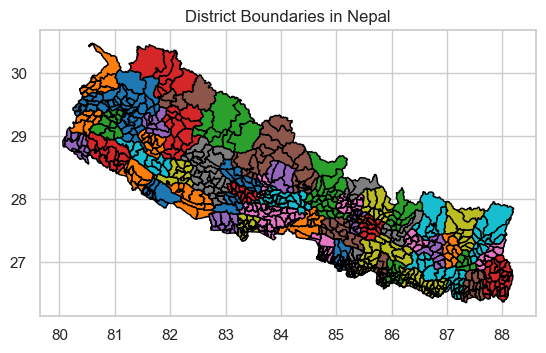

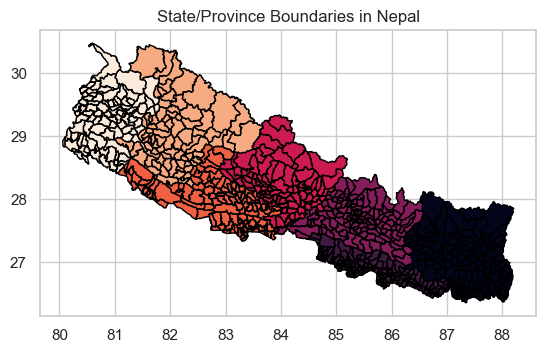

In [56]:
# Plot Vector Data
def plot_vector_data(gdf, column, title):
    gdf.plot(column=column, edgecolor='black')
    plt.title(title)
    plt.show()
plot_vector_data(districts_gdf, 'DISTRICT', 'District Boundaries in Nepal')
plot_vector_data(districts_gdf, 'STATE_CODE', 'State/Province Boundaries in Nepal')


In [57]:
# Overlay Vector Data on Raster
def overlay_raster_vector(raster, extent, gdf, column, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(raster, cmap='viridis', extent=extent)
    gdf.plot(ax=ax, column=column, facecolor='none', edgecolor='black')
    plt.title(title)
    plt.show()

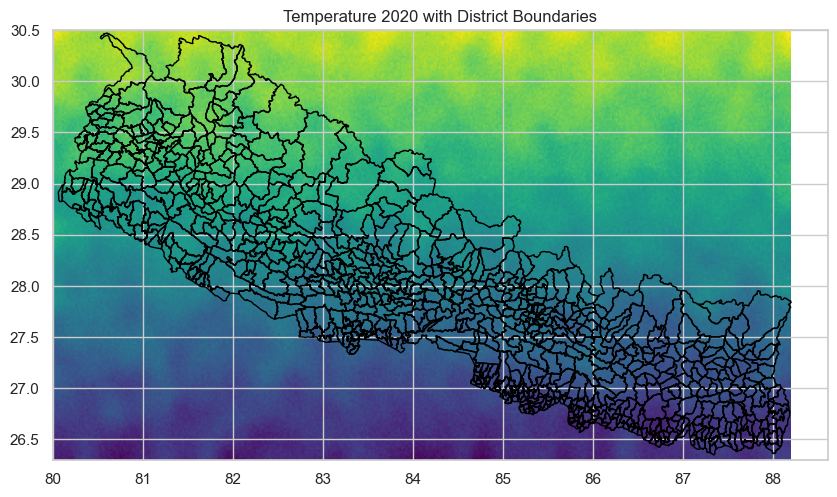

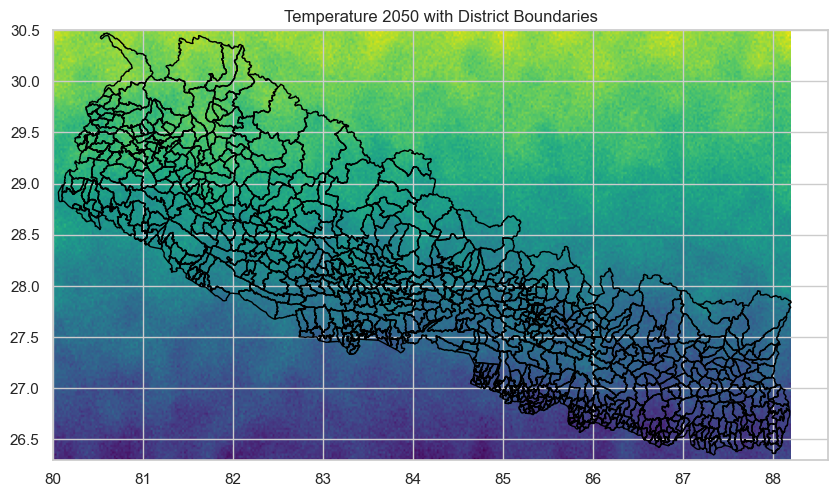

In [58]:

for year in ['2020', '2050']:
    overlay_raster_vector(temperature_data[f'temperature_{year}'], extent, districts_gdf, 'DISTRICT', f'Temperature {year} with District Boundaries')

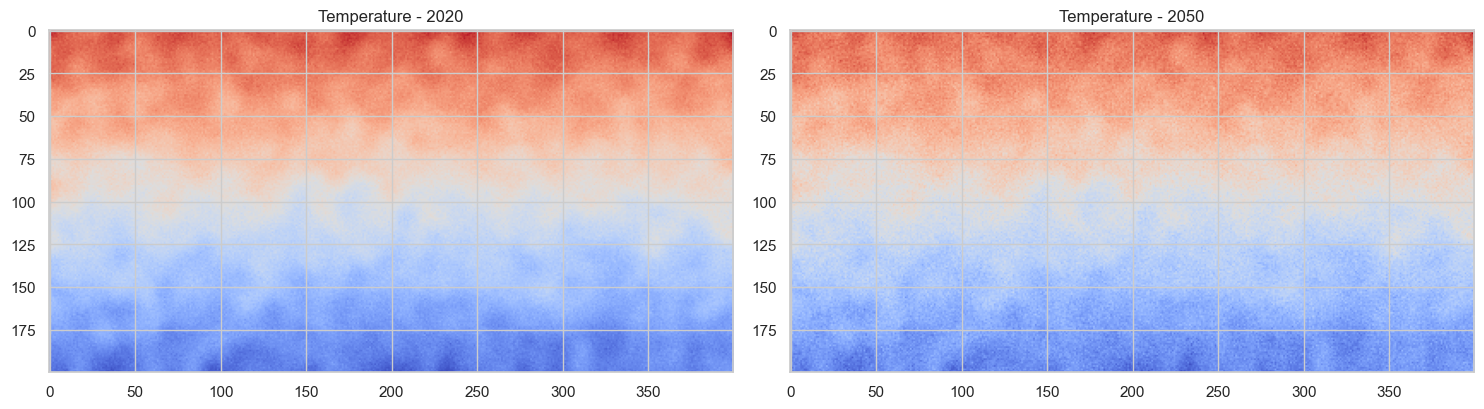

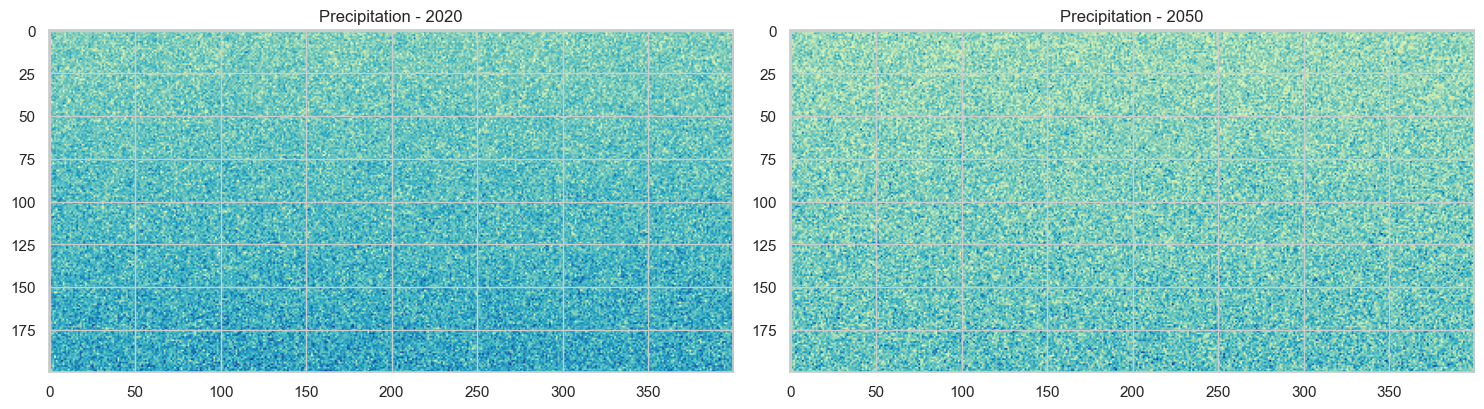

In [59]:
# Climate Trend Visualization
def plot_trends_over_time(data_dict, title, cmap):
    fig, axes = plt.subplots(1, len(data_dict), figsize=(15, 5))
    for i, (year, data) in enumerate(data_dict.items()):
        ax = axes[i]
        ax.imshow(data, cmap=cmap)
        ax.set_title(f'{title} - {year[-4:]}')
    plt.tight_layout()
    plt.show()

plot_trends_over_time(temperature_data, 'Temperature', 'coolwarm')
plot_trends_over_time(precipitation_data, 'Precipitation', 'YlGnBu')

In [60]:
# Compute Statistics
def calculate_statistics(data):
    return {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }

In [61]:
temp_stats = {year: calculate_statistics(temp) for year, temp in temperature_data.items()}
precip_stats = {year: calculate_statistics(precip) for year, precip in precipitation_data.items()}

print('Temperature Statistics:', temp_stats)
print('Precipitation Statistics:', precip_stats)


Temperature Statistics: {'temperature_2020': {'Mean': np.float64(-7.577415755765925), 'Median': np.float64(-7.685702505675591), 'Min': np.float64(-23.198749681712457), 'Max': np.float64(8.138670708338557)}, 'temperature_2050': {'Mean': np.float64(-5.472906912267607), 'Median': np.float64(-5.578674327456623), 'Min': np.float64(-22.08736312988644), 'Max': np.float64(11.473132313566794)}}
Precipitation Statistics: {'precipitation_2020': {'Mean': np.float64(50.83796524449648), 'Median': np.float64(50.36654491061009), 'Min': np.float64(6.8563433623171495), 'Max': np.float64(102.83267376645965)}, 'precipitation_2050': {'Mean': np.float64(48.285593218473295), 'Median': np.float64(46.74243795125839), 'Min': np.float64(-6.410086048906941), 'Max': np.float64(134.9692970311526)}}


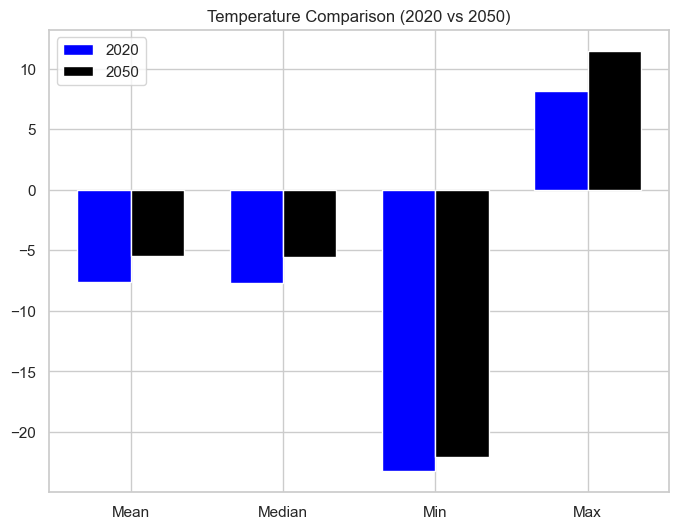

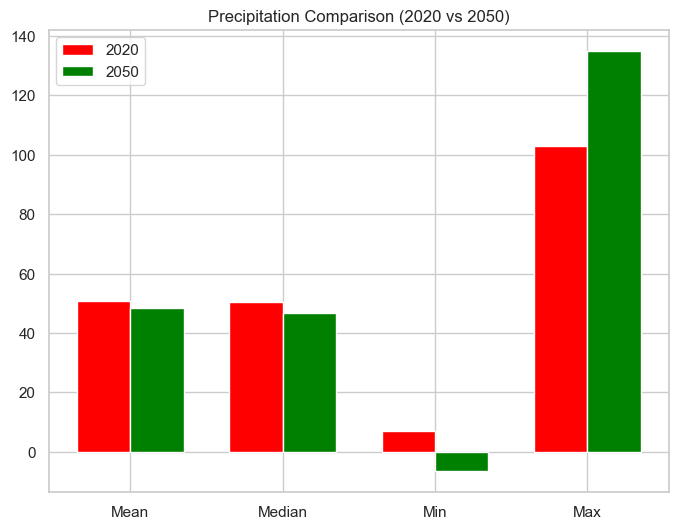

In [62]:
# Bar Graph Plotting
def plot_comparison_chart(title, stats_2020, stats_2050, color_2020, color_2050):
    labels = ['Mean', 'Median', 'Min', 'Max']
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(x - width/2, stats_2020.values(), width, label='2020', color=color_2020)
    ax.bar(x + width/2, stats_2050.values(), width, label='2050', color=color_2050)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(f'{title} Comparison (2020 vs 2050)')
    ax.legend()
    plt.show()

plot_comparison_chart('Temperature', temp_stats['temperature_2020'], temp_stats['temperature_2050'], 'blue', 'black')
plot_comparison_chart('Precipitation', precip_stats['precipitation_2020'], precip_stats['precipitation_2050'], 'red', 'green')


In [63]:
# Line Graph for Trends
years = [2020, 2050]

temp_mean_values = [temp_stats['temperature_2020']['Mean'], temp_stats['temperature_2050']['Mean']]
precip_mean_values = [precip_stats['precipitation_2020']['Mean'], precip_stats['precipitation_2050']['Mean']]

interpolated_years = np.arange(2020, 2051)
temp_interpolated = np.interp(interpolated_years, years, temp_mean_values)
precip_interpolated = np.interp(interpolated_years, years, precip_mean_values)

trend_df = pd.DataFrame({
    'Year': interpolated_years,
    'Temperature (°C)': temp_interpolated,
    'Precipitation (mm)': precip_interpolated
})

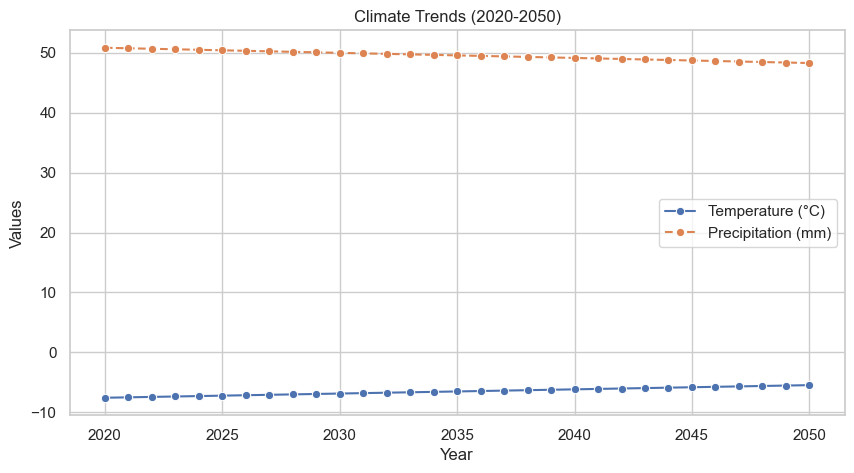

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=trend_df, x='Year', y='Temperature (°C)', marker='o', label='Temperature (°C)')
sns.lineplot(data=trend_df, x='Year', y='Precipitation (mm)', marker='o', label='Precipitation (mm)', linestyle='dashed')
plt.title('Climate Trends (2020-2050)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

## Conclusion
This project successfully analyzed climate trends in Nepal by comparing temperature and precipitation data between 2020 and 2050. Through the integration of GIS techniques, raster data analysis, and statistical visualizations, the project highlights clear evidence of rising temperatures and varying precipitation patterns across districts.

The code efficiently:
- Loaded and processed vector and raster datasets.
- Overlaid district boundaries onto climate data for localized analysis.
- Visualized trends with meaningful graphs, making it easy to interpret long-term changes.
- Generated summary statistics to quantify temperature and precipitation changes.


Significance: Highlights the urgency for climate action and provides data-driven insights for policymakers.
The insights gained from this analysis can support policymakers and researchers in understanding future climate scenarios and planning mitigation strategies. Further enhancements could include incorporating more climate models, increasing the temporal resolution of datasets, and integrating socio-economic data to assess broader climate impacts.  

This project serves as a solid foundation for future climate analysis initiatives and underscores the importance of data-driven decision-making in the face of climate change.
